---
## 실험 환경 정보
### Python 버전: 3.12.9
### Pandas 버전: 2.2.3
### tqdm 버전: 4.67.1
### contractions 버전: 0.1.73
### gensim 버전: 4.3.3
### matplotlib 버전: 3.10.1
### numpy 버전: 1.26.4
---

## 데이터 전처리

- **Pandas**: 결측치, 중복 데이터 제거

- **re.sub, lower**: 텍스트 내 불필요한 문자 제거, 소문자 변환

- **contractions 라이브러리**: 축약어 확장

In [1]:
import pandas as pd
from tqdm import tqdm

# tqdm 설정
tqdm.pandas()

# RAW_recipes.csv 파일을 읽어와 데이터프레임으로 변환 
df = pd.read_csv('RAW_recipes.csv')

# pandas 출력 옵션 변경
pd.set_option('display.max_colwidth', None)  # 컬럼 너비 제한 해제
pd.set_option('display.width', 200)          # 콘솔 출력 너비 늘리기

# 데이터 구성 확인
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-pat

In [2]:
# 분석에 필요한 열만 남기기
df_recipes = df.copy()
df_recipes = df_recipes[['name', 'ingredients']]
df_recipes.head()

,name,ingredients
0,arriba baked winter squash mexican style,"['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']"
1,a bit different breakfast pizza,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']"
2,all in the kitchen chili,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']"
3,alouette potatoes,"['spreadable cheese with garlic and herbs', 'new potatoes', 'shallots', 'parsley', 'tarragon', 'olive oil', 'red wine vinegar', 'salt', 'pepper', 'red bell pepper', 'yellow bell pepper']"
4,amish tomato ketchup for canning,"['tomato juice', 'apple cider vinegar', 'sugar', 'salt', 'pepper', 'clove oil', 'cinnamon oil', 'dry mustard']"


In [3]:
# 중복되는 레시피명('name') 제거
df_recipes = df_recipes.drop_duplicates(subset='name').reset_index(drop=True)

In [4]:
# 결측치 확인
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230186 entries, 0 to 230185
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   name         230185 non-null  object
 1   ingredients  230186 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [5]:
# 결측치 제거
df_recipes.dropna(subset=['name'], inplace=True)

# 결측치 제거 확인
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230185 entries, 0 to 230185
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   name         230185 non-null  object
 1   ingredients  230185 non-null  object
dtypes: object(2)
memory usage: 5.3+ MB


In [6]:
# ingredients가 진짜 파이썬 리스트인지 확인(str로 나오는 경우 리스트처럼 생긴 문자열)
type(df_recipes['ingredients'].iloc[0])

str

In [7]:
import ast

# 문자열로 저장된 리스트들을 실제 리스트 객체로 변환
df_recipes['ingredients'] = df_recipes['ingredients'].progress_apply(ast.literal_eval)

# 변환 후 다시 한 번 변환이 되었는지 확인(list로 나오는 경우 정상 변환)
type(df_recipes['ingredients'].iloc[0])

100%|██████████| 230185/230185 [00:04<00:00, 50368.71it/s]


list

In [8]:
import re
import contractions

# 재료명 전처리 함수 정의
def preprocess_ingredient(ingredient):
    # 특수 문자 제거
    ingredient_no_specials = re.sub(r'[^a-zA-Z]', ' ', ingredient)

    # 양/개수 관련 제거
    ingredient_no_count = re.sub(r'\d+[\d\s\/-]*(?:cups?|tbsp|tsp|teaspoons?|tablespoons?|oz|ounces?|lb|pounds?|kg|g|grams?|ml|l|liters?)?', ''
                                 , ingredient_no_specials)

    # 공백 정리
    ingredient_clean = re.sub(r'\s+', ' ', ingredient_no_count).strip()

    # 소문자 변환
    ingredient_lower = ingredient_clean.lower()

    return ingredient_lower

# 레시피명 전처리 함수 정의
def preprocess_recipe_name(recipe_name):
    # 축약어 확장
    expanded_recipe_name = contractions.fix(recipe_name)

    # 특수 문자 제거
    recipe_name_no_specials = re.sub(r'[^a-zA-Z]', ' ', expanded_recipe_name)

    # 공백 정리
    recipe_name_clean = re.sub(r'\s+', ' ', recipe_name_no_specials).strip()

    # 소문자 변환
    recipe_name_lower = recipe_name_clean.lower()
    
    # 공백으로 연결된 문자열로 반환
    return recipe_name_lower

df_recipes['cleaned_ingredients'] = df_recipes['ingredients'].progress_apply(
    lambda ings: [preprocess_ingredient(ing) for ing in ings]
)
df_recipes['cleaned_name'] = df_recipes['name'].progress_apply(preprocess_recipe_name)

100%|██████████| 230185/230185 [00:01<00:00, 204973.87it/s]


In [9]:
# 재료명을 무작위로 3개 추출
sample_recipes = df_recipes.sample(n=3)

# 재료명 전처리 결과 비교
for i in range(min(3, len(df_recipes))):
    print(f"\n레시피 {i+1}:")
    print(f"원본: {str(sample_recipes['ingredients'].iloc[i])[:100]}...")
    print(f"정제: {sample_recipes['cleaned_ingredients'].iloc[i][:5]}")


레시피 1:
원본: ['dijon mustard', 'champagne vinegar', 'olive oil', 'salt', 'fresh ground black pepper']...
정제: ['dijon mustard', 'champagne vinegar', 'olive oil', 'salt', 'fresh ground black pepper']

레시피 2:
원본: ['lean ground beef', 'bacon', 'butter', 'onion', 'garlic', 'assorted fresh vegetables', 'beef broth'...
정제: ['lean ground beef', 'bacon', 'butter', 'onion', 'garlic']

레시피 3:
원본: ['prepared pizza crust', 'mozzarella string cheese', 'pizza sauce', 'pepperoni', 'italian cheese ble...
정제: ['prepared pizza crust', 'mozzarella string cheese', 'pizza sauce', 'pepperoni', 'italian cheese blend']


In [10]:
# 재료명을 무작위로 3개 추출
sample_recipes = df_recipes.sample(n=3)

# 재료명 전처리 결과 비교
for i in range(min(3, len(df_recipes))):
    print(f"\n레시피 {i+1}:")
    print(f"원본: {sample_recipes['name'].iloc[i]}")
    print(f"정제: {sample_recipes['cleaned_name'].iloc[i]}")


레시피 1:
원본: northwoods inn cheese bread spread
정제: northwoods inn cheese bread spread

레시피 2:
원본: quinoa stir fry with spinach   walnuts
정제: quinoa stir fry with spinach walnuts

레시피 3:
원본: barefoot contessa s blueberry sauce
정제: barefoot contessa s blueberry sauce


## 추천 시스템 모델링

**1) 재료 적합도 (재료 포함 여부와 비율)**

- 보유한 재료가 레시피 재료에 얼마나 많이 포함되어 있느냐를 수치화
- **재료 적합도 점수: (보유 재료 ∩ 레시피 재료) / 레시피 재료 총 수**

**2) 재료 간 유사도 (Word2Vec 임베딩 기반)**

- **재료명**들을 Word2Vec 벡터로 임베딩(Kaggle Food.com Dataset(`RAW_recipes.csv`)을 사용해서 **직접 Word2Vec을 Skip-Gram으로 학습**)
- 레시피에 필요한 재료 중 **사용자가 보유하고 있지 않은 재료들에 대해 사용자가 현재 가진 재료들과의 유사도**를 평가(부족한 각 재료가 사용자 보유 재료들과 얼마나 비슷한지 **코사인 유사도(cosine similarity)**를 통해 확인)
- 유사도 점수를 합산하여, **부족 재료를 대체하거나 보완하기 쉬운 정도**를 나타내는 최종 재료 유사도 점수를 계산
- 이 점수가 높을수록 사용자가 해당 레시피를 만들기 위해 필요한 추가 노력이 줄어들거나, 대체 재료로 해결될 가능성이 높다는 의미

**3) **최종 추천 점수** = α * 재료 적합도 점수 + (1 - α) * 유사도 점수**
 (α는 0~1 사이 가중치, 경험적으로 0.5 정도부터 시작)

In [11]:
from gensim.models import Word2Vec

# 모델 학습 (Skip-Gram 사용. vector_size, min_count 조절 가능)
model = Word2Vec(sentences=df_recipes['cleaned_ingredients'], vector_size=100, window=5, min_count=1, sg=1)

In [12]:
# 사용자 보유 재료 가정(전처리 완료, 모델 학습 시 쓰인 재료와 일치하도록)
user_ingredients = ['margarine', 'honey', 'salt']

# 가중치 설정
alpha = 0.4  # 재료 적합도 40%, 유사도 60%

# 함수 정의
def calculate_scores(recipe_ingredients, user_ingredients, model, alpha=0.5):
    # 1. 재료 적합도 점수
    # 특정 레시피(recipe_ingredients)에 필요한 재료들 중에서,
    # 사용자가 보유하고 있는 재료(user_ingredients)와 겹치는 재료들만 matched 리스트로 모음(보유 재료 ∩ 레시피 재료)
    matched = [ing for ing in recipe_ingredients if ing in user_ingredients]
    # '재료 적합도 점수: (보유 재료 ∩ 레시피 재료) / 레시피 재료 총 수'를 정확히 계산
    ingredient_score = len(matched) / len(recipe_ingredients)

    # 2. 유사도 점수(Gensim 4.x 이상 기준으로 model.wv로 작성됨)
    similarity_scores = []
    # 레시피에 필요한 재료(recipe_ingredients) 중 사용자가 가지고 있지 않은 재료(ing not in user_ingredients)를 하나씩 확인
    for ing in recipe_ingredients:
        if ing not in user_ingredients and ing in model.wv:
            # 부족한 재료 ing가 사용자 보유 재료(user_ingredients) 각각과 얼마나 유사한지를 model.wv.similarity(ing, u_ing)를 통해 코사인 유사도로 계산
            sims = [model.wv.similarity(ing, u_ing) for u_ing in user_ingredients if u_ing in model.wv]
            # 부족한 재료 ing와 사용자 보유 재료들 중 가장 유사도가 높은 값(max(sims))을 선택하여 similarity_scores 리스트에 추가
            if sims:
                similarity_scores.append(max(sims))
    # 이렇게 모인 similarity_scores의 평균을 내어 최종 similarity_score로 사용
    if similarity_scores:
        similarity_score = sum(similarity_scores) / len(similarity_scores)
    else:
        similarity_score = 0.0

    # 3. 최종 점수
    # 최종 추천 점수 = α * 재료 적합도 점수 + (1 - α) * 유사도 점수
    final_score = alpha * ingredient_score + (1 - alpha) * similarity_score
    return final_score

# 각 레시피에 대해 점수 계산
df_recipes['score'] = df_recipes['cleaned_ingredients'].progress_apply(
    lambda x: calculate_scores(x, user_ingredients, model, alpha)
)

# 점수 기준 정렬 후 상위 추천(테스트)
top_recommendations = df_recipes.sort_values(by='score', ascending=False).head(10).reset_index(drop=True)
print(top_recommendations[['cleaned_name', 'cleaned_ingredients', 'score']])

100%|██████████| 230185/230185 [00:42<00:00, 5412.37it/s]

                                cleaned_name                     cleaned_ingredients     score
0        whipped honey butter with varieties                         [butter, honey]  0.730278
1                               honey butter                         [butter, honey]  0.730278
2                     honey butter shanachie                         [butter, honey]  0.730278
3                   susan s honey bee butter                         [butter, honey]  0.730278
4                        honey butter spread                         [butter, honey]  0.730278
5                    orange marmalade butter       [butter, honey, orange marmalade]  0.589737
6  cleaning and seasoning cast iron cookware               [salt, crisco shortening]  0.584362
7                              salty almonds         [natural almonds, butter, salt]  0.572511
8         lazy oven cooked frozen vegetables  [frozen broccoli spears, butter, salt]  0.568393
9                      honey roasted peanuts      

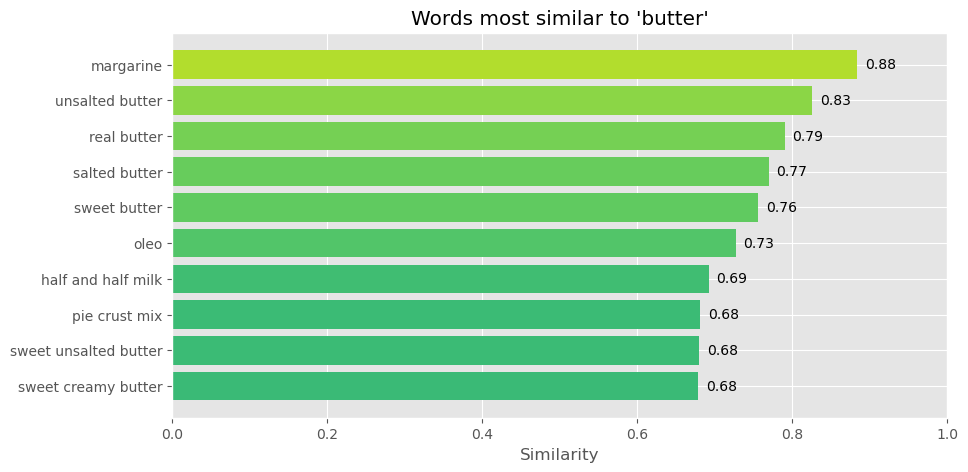

In [13]:
# Word2Vec 유사 단어 시각화(butter 예시)

import matplotlib.pyplot as plt

def plot_similar_words(model, word):
    if word not in model.wv:
        print(f"'{word}' not in vocabulary.")
        return

    similar_words = model.wv.most_similar(word, topn=10)
    words = [w for w, _ in similar_words]
    scores = [s for _, s in similar_words]

    plt.style.use('ggplot')
    plt.figure(figsize=(10, 5))
    plt.xlim(0, 1)

    # 유사도에 따라 색상 변화
    colors = plt.cm.viridis(scores[::-1])

    plt.barh(words[::-1], scores[::-1], color=colors)
    plt.xlabel("Similarity")
    plt.title(f"Words most similar to '{word}'")

    # 그래프에서 각 막대 옆에 수치(유사도 점수)를 표시
    for i, (word, score) in enumerate(zip(words[::-1], scores[::-1])):
        # 좌표 (막대 오른쪽 끝 + 0.01, y)에 소수점 둘째 자리까지 텍스트 표시
        plt.text(score + 0.01, i, f"{score:.2f}", va='center')

    plt.show()

plot_similar_words(model, "butter")


## 모델 평가

#### 재료 적합도 점수 + 임베딩 유사도 점수 기반 정성 평가

- 특정 시나리오를 가진 가상의 사용자 A를 설정하고, 그가 보유한 재료 목록을 바탕으로 점수 계산
- 각 α 값에 따른 추천 결과 차이를 표나 그래프로 시각화

In [14]:
# alpha 값 목록
alpha_values = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

# Top-N을 뽑을 개수 n
top_n = 5

top_recipes_per_alpha = {}

for a in tqdm(alpha_values):
    # alpha에 따른 컬럼명 동적 생성
    col_name = f'score_alpha_{a}'

    # 각 alpha별로 점수 계산
    df_recipes[col_name] = df_recipes['cleaned_ingredients'].progress_apply(
        lambda x: calculate_scores(x, user_ingredients, model, alpha=a)
    )
    # Top-N 추출 후 저장
    top_n_df = df_recipes.sort_values(by=col_name, ascending=False).head(top_n)[['cleaned_name', 'cleaned_ingredients', col_name]]
    top_recipes_per_alpha[a] = top_n_df

# 출력 예시: alpha=0.5의 Top N
print(top_recipes_per_alpha[0.5])


100%|██████████| 7/7 [05:01<00:00, 43.12s/it]

                               cleaned_name cleaned_ingredients  score_alpha_0.5
224332  whipped honey butter with varieties     [butter, honey]         0.691898
203527             susan s honey bee butter     [butter, honey]         0.691898
106583               honey butter shanachie     [butter, honey]         0.691898
106584                  honey butter spread     [butter, honey]         0.691898
106579                         honey butter     [butter, honey]         0.691898


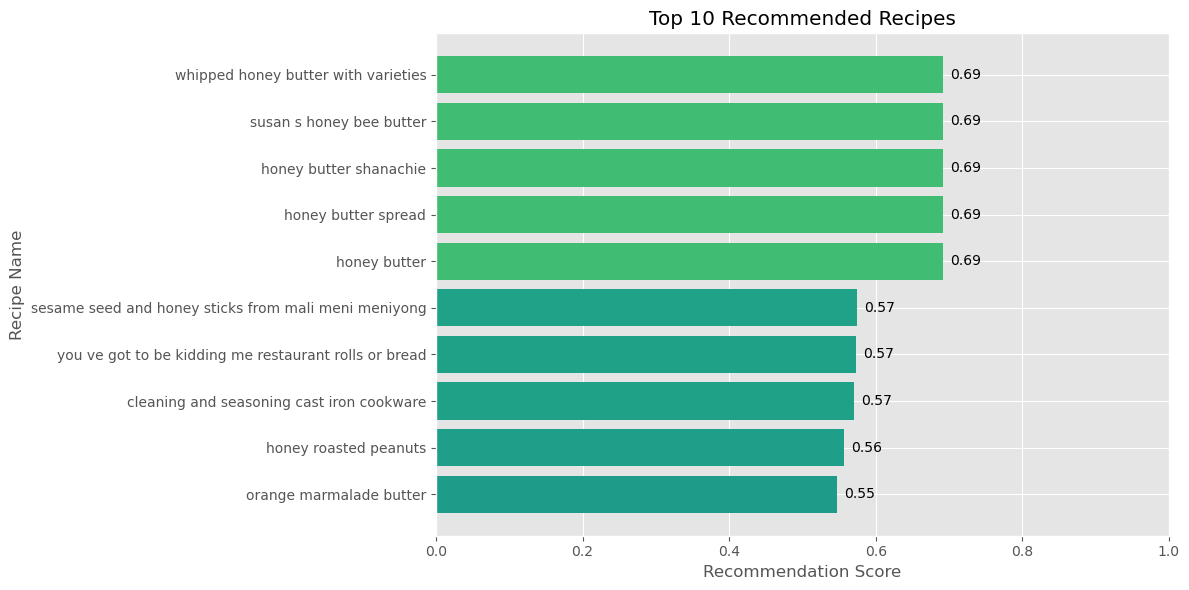

In [15]:
# 추천된 레시피들의 점수 시각화
top_n = 10
top_recipes = df_recipes.sort_values(by='score_alpha_0.5', ascending=False).head(top_n)

plt.figure(figsize=(12, 6))

# 유사도에 따라 색상 변화
colors = plt.cm.viridis(top_recipes['score_alpha_0.5'])
bars = plt.barh(top_recipes['cleaned_name'], top_recipes['score_alpha_0.5'], color=colors)

plt.xlim(0.0, 1.0)

plt.xlabel('Recommendation Score')
plt.ylabel('Recipe Name')
plt.title('Top 10 Recommended Recipes')

# 점수가 높은 레시피가 위에 위치
plt.gca().invert_yaxis()

# 각 막대 옆에 점수 표시 (소수점 둘째 자리까지)
for bar in bars:
    # width: 막대의 길이 (score)
    width = bar.get_width()

    # y_pos: 막대의 중심 y좌표
    y_pos = bar.get_y() + bar.get_height() / 2
    
    plt.text(width + 0.01, y_pos, f"{width:.2f}", va='center')

# 자동으로 레이아웃 설정
plt.tight_layout()

plt.show()


In [16]:
# 각 alpha별 Top-N 레시피, 재료, 점수 출력
for a in alpha_values:
    print(f"Alpha = {a}")
    print(top_recipes_per_alpha[a])
    print("\n" + "="*40 + "\n")

Alpha = 0.0
                               cleaned_name cleaned_ingredients  score_alpha_0.0
203527             susan s honey bee butter     [butter, honey]         0.883796
106579                         honey butter     [butter, honey]         0.883796
106583               honey butter shanachie     [butter, honey]         0.883796
106584                  honey butter spread     [butter, honey]         0.883796
224332  whipped honey butter with varieties     [butter, honey]         0.883796


Alpha = 0.1
                               cleaned_name cleaned_ingredients  score_alpha_0.1
106584                  honey butter spread     [butter, honey]         0.845417
203527             susan s honey bee butter     [butter, honey]         0.845417
224332  whipped honey butter with varieties     [butter, honey]         0.845417
106579                         honey butter     [butter, honey]         0.845417
106583               honey butter shanachie     [butter, honey]         0.845417




#### α 값 변화에 따른 Top-5 추천 평균 점수 변화

In [17]:
# 점수 계산 및 평균 점수 저장
average_scores = []
for a in tqdm(alpha_values):
    col_name = f'score_alpha_{a}'
    avg_score = df_recipes.sort_values(by=col_name, ascending=False).head(top_n)[col_name].mean()
    average_scores.append(avg_score)

100%|██████████| 7/7 [00:00<00:00, 12.43it/s]


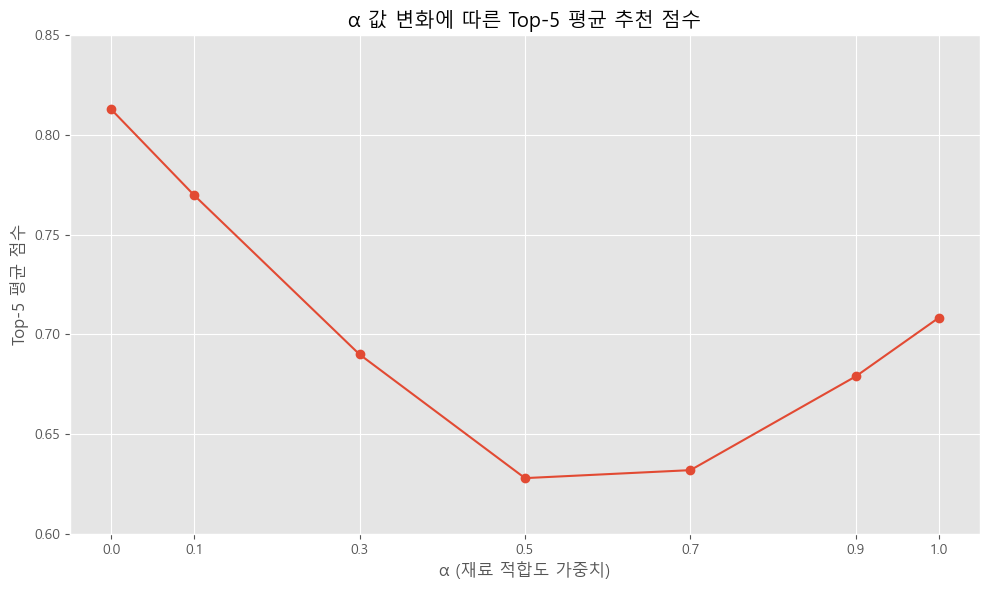

In [18]:
# 시각화
from matplotlib import rcParams
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, average_scores, marker='o')
plt.title("α 값 변화에 따른 Top-5 평균 추천 점수")
plt.xlabel("α (재료 적합도 가중치)")
plt.ylabel("Top-5 평균 점수")

plt.grid(True)
plt.xticks(alpha_values)
plt.yticks(np.arange(0.6, 0.86, 0.05))
plt.tight_layout()
plt.show()